In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#正样本
x1 = [0,1]
y1 = [1,0]
#负样本
x2 = [0,1]
y2 = [0,1]

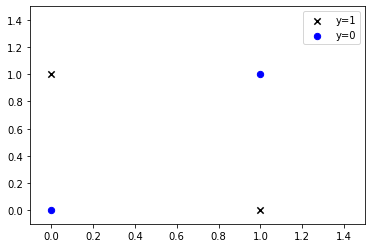

In [3]:
plt.figure(figsize = (6,4))
plt.scatter(x1,y1,c = 'k', marker = 'x',s = 40 ,label = 'y=1')
plt.scatter(x2,y2,c = 'b',marker = 'o',s = 40 ,label = 'y=0')
plt.xlim(-0.1,1.5)
plt.ylim(-0.1,1.5)
plt.legend(loc = 'best')    # 设置 图例所在的位置 使用推荐位置
plt.show()

In [4]:
def sigmoid(x, deriv=False):
    if (deriv == True):
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [5]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0],[1],[1],[0]])

In [6]:
np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2 * np.random.random((2, 4)) - 1
syn1 = 2 * np.random.random((4, 1)) - 1

syn0

array([[-0.16595599,  0.44064899, -0.99977125, -0.39533485],
       [-0.70648822, -0.81532281, -0.62747958, -0.30887855]])

In [7]:
for j in range(50000):
    # Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = sigmoid(np.dot(l0, syn0))
    l2 = sigmoid(np.dot(l1, syn1))
    # how much did we miss the target value?
    l2_error = y - l2
    if (j % 10000) == 0:
        print("Error:" + str(np.mean(np.abs(l2_error))))
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error * sigmoid(l2, deriv=True)
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * sigmoid(l1, deriv=True)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
print("Output After Training:")
print(l2)

Error:0.4995289647766772
Error:0.018951601482048636
Error:0.012674637262799139
Error:0.010027680242236313
Error:0.008505922371037249
Output After Training:
[[0.00886467]
 [0.99345174]
 [0.9920439 ]
 [0.00662409]]


In [8]:
data = loadmat('../data/digital.mat')

data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [9]:
# 把X、y转化为数组形式，以便于计算
X = data['X']  #提取X变量
y = data['y']  #提取y变量

X.shape, y.shape  #X、y的形状

((5000, 400), (5000, 1))

In [10]:
X[0,100:120]  #矩阵X第一行第101列至第119列的数据

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.28335523e-17, -3.26286765e-04, -1.38651604e-02,
        8.15651552e-02,  3.82800381e-01,  8.57849775e-01,  1.00109761e+00,
        9.69710638e-01,  9.30928598e-01,  1.00383757e+00,  9.64157356e-01,
        4.49256553e-01, -5.60408259e-03, -3.78319036e-03,  0.00000000e+00])

In [11]:
# from sklearn.preprocessing import OneHotEncoder  #导入preproccessing库的OneHotEncoder
# encoder = OneHotEncoder(sparse=False)  #One-Hot编码，把每一位变成独立的一个特征值
# y_onehot = encoder.fit_transform(y) #对y进行One-Hot编码，转换成相应0-1变量
# y_onehot.shape  #y_onehot的形状

In [12]:
#y[0], y_onehot[0,:]

In [13]:
scaler = StandardScaler() # 标准化转换
scaler.fit(X)  # 训练标准化对象
X = scaler.transform(X)   # 转换数据集

In [16]:
#以25%的数据构建测试样本，剩余作为训练样本
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state =2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3750, 400), (1250, 400), (3750, 1), (1250, 1))

In [21]:
#设置MLP算法
mlp = MLPClassifier(solver='adam',activation='tanh', alpha=1e-5, hidden_layer_sizes=(50,),learning_rate_init=0.001, max_iter=2000) 
mlp.fit(X_train, y_train.ravel())  #对训练集进行学习

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [22]:
print('每层网络层系数矩阵维度：\n',[coef.shape for coef in mlp.coefs_])
y_pred = mlp.predict(X_test)  #预测测试集输出
print('预测结果：',y_pred)

每层网络层系数矩阵维度：
 [(400, 50), (50, 10)]
预测结果： [7 8 3 ... 3 7 9]


In [23]:
mlp.coefs_

[array([[ 4.30485706e-08,  6.16105894e-06,  1.87653680e-06, ...,
         -2.36157485e-05, -9.68063402e-07, -4.50076122e-07],
        [ 1.63093911e-05, -2.69390749e-06, -6.36048345e-07, ...,
         -8.35982864e-06,  5.90712060e-06, -5.60633570e-06],
        [ 1.41238081e-01, -1.47794916e-02, -4.18954762e-02, ...,
          8.03714609e-02, -1.20900895e-02, -4.05654585e-02],
        ...,
        [-5.38744252e-02,  1.22897559e-02,  2.57752319e-02, ...,
          5.24669999e-02,  1.34369525e-01,  6.27650319e-02],
        [-6.79249293e-02, -2.24829794e-01, -1.74947555e-01, ...,
         -1.15438327e-01, -1.42007515e-01,  4.81945741e-02],
        [ 6.45167182e-06, -1.64063095e-06,  1.00686155e-06, ...,
         -2.75480386e-07, -2.62033570e-05,  1.71329240e-06]]),
 array([[ 2.83229278e-01, -6.77606916e-01,  5.15009501e-01,
         -1.15098958e-01,  3.48016056e-01, -3.96546739e-02,
          1.78425252e-02,  8.31124621e-02, -4.69561725e-01,
         -4.42466394e-01],
        [ 4.92748293e-

In [24]:
print (mlp.intercepts_)   #列表中第i个元素代表i+1层的偏差向量

[array([-0.21421309, -0.16383778, -0.00520407, -0.0416013 , -0.01838098,
        0.03442993,  0.00557392, -0.08572325,  0.15663054,  0.02403143,
        0.22965511, -0.02299538, -0.07717564,  0.22394861, -0.08938573,
       -0.13310722, -0.07052722,  0.10827851,  0.16043275,  0.09907562,
       -0.03348603,  0.09830713,  0.09531787, -0.19512716,  0.26085051,
        0.03169106, -0.06204615,  0.16978875,  0.11815262,  0.20187209,
       -0.05218932, -0.01303185, -0.15951674,  0.23800819,  0.00659239,
       -0.13078663,  0.04569373,  0.21111541, -0.09253123, -0.23226657,
        0.16040385,  0.08573603,  0.19998524,  0.15613985, -0.13961318,
        0.22841195, -0.17809736, -0.10704084, -0.05484201, -0.03284973]), array([-0.06243186,  0.26736385,  0.29581988, -0.23202154, -0.05793321,
       -0.04112719,  0.15796608, -0.15870651, -0.01745207, -0.39082047])]


In [25]:
accuracy_score(y_test, y_pred)  #计算准确率

0.9112

In [26]:
confusion_matrix(y_true=y_test, y_pred=y_pred)  #计算混淆矩阵

array([[120,   1,   2,   0,   0,   0,   0,   2,   1,   0],
       [  1, 102,   1,   3,   1,   5,   2,   3,   1,   0],
       [  1,   2, 110,   1,   2,   1,   4,   1,   3,   0],
       [  3,   1,   0, 126,   0,   0,   0,   0,   5,   0],
       [  0,   1,   4,   0, 102,   4,   0,   3,   0,   0],
       [  1,   4,   0,   0,   0, 112,   0,   0,   1,   0],
       [  2,   1,   0,   3,   0,   0, 111,   1,   4,   1],
       [  3,   1,   3,   0,   3,   1,   2, 124,   2,   2],
       [  1,   0,   2,   4,   1,   1,   2,   1, 104,   1],
       [  0,   0,   0,   1,   3,   0,   0,   0,   0, 128]], dtype=int64)